In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [2]:
year = 1930
dfStarsByYear = pd.read_json(f'http://localhost:8000/stars/by_birthyear/{year}')
dfStarsByYear.set_index('id', inplace=True)
dfStarsByYear

,name,birthdate
id,,
273359,Abel Fernandez,1930-01-01
721031,Alejandro Rey,1930-01-01
193238,Alfie Curtis,1930-01-01
339141,Alvin Greenman,1930-01-01
665708,Angela Paton,1930-01-01
...,...,...
888845,Warren Vanders,1930-01-01
404298,Will Hutchins,1930-01-01
431499,William Joyce,1930-01-01


In [3]:
t_part = "Star"
dfMoviesByTitlePart = pd.read_json(f'http://localhost:8000/movies/by_title_part?t={t_part}')
dfMoviesByTitlePart.set_index('id', inplace=True)
dfMoviesByTitlePart

,title,year,duration
id,,,
8317298,Chanel No. 5: La Star,1990,1.0
778043,Seeing Stars,1927,NaN
49793,Star in the Dust,1956,80.0
76759,Star Wars: Episode IV - A New Hope,1977,121.0
8933914,Star Wars: Episode IV: A New Hope - Deleted Sc...,2011,8.0
2527338,Star Wars: Episode IX - The Rise of Skywalker,2019,142.0
80684,Star Wars: Episode V - The Empire Strikes Back,1980,124.0
8924990,Star Wars: Episode V - The Empire Strikes Back...,1980,12.0
86190,Star Wars: Episode VI - Return of the Jedi,1983,131.0


In [4]:
limit = 30
response  = requests.get(f'http://localhost:8000/stars/stats_movie_by_actor?minc={limit}')
if response.status_code == 200:
    data_json = response.json()
    data_flatten = [ {**actor_dict, 'movie_count':mc, 'first_movie':fm, 'last_movie':lm} for actor_dict, mc, fm, lm in data_json]
    dfStatsActors = pd.DataFrame(data_flatten)
    dfStatsActors.set_index('id', inplace=True)
    print(dfStatsActors)
else:
    print('Error',response.status_code,response.json(), sep=', ')

                          name   birthdate  movie_count  first_movie  \
id                                                                     
78                  John Wayne  1907-05-26          172         1926   
1230             Harrison Ford  1884-03-16           86         1915   
230         Sylvester Stallone  1946-07-06           73         1969   
125               Sean Connery  1930-08-25           73         1954   
158                  Tom Hanks  1956-07-09           69         1980   
241      Jean-Claude Van Damme  1960-10-18           66         1979   
142             Clint Eastwood  1930-05-31           63         1955   
148              Harrison Ford  1942-07-13           63         1966   
216      Arnold Schwarzenegger  1947-07-30           56         1970   
226                 Will Smith  1968-09-25           50         1988   
217            Martin Scorsese  1942-11-17           41         1967   
33            Alfred Hitchcock  1899-08-13           40         

<BarContainer object of 195 artists>

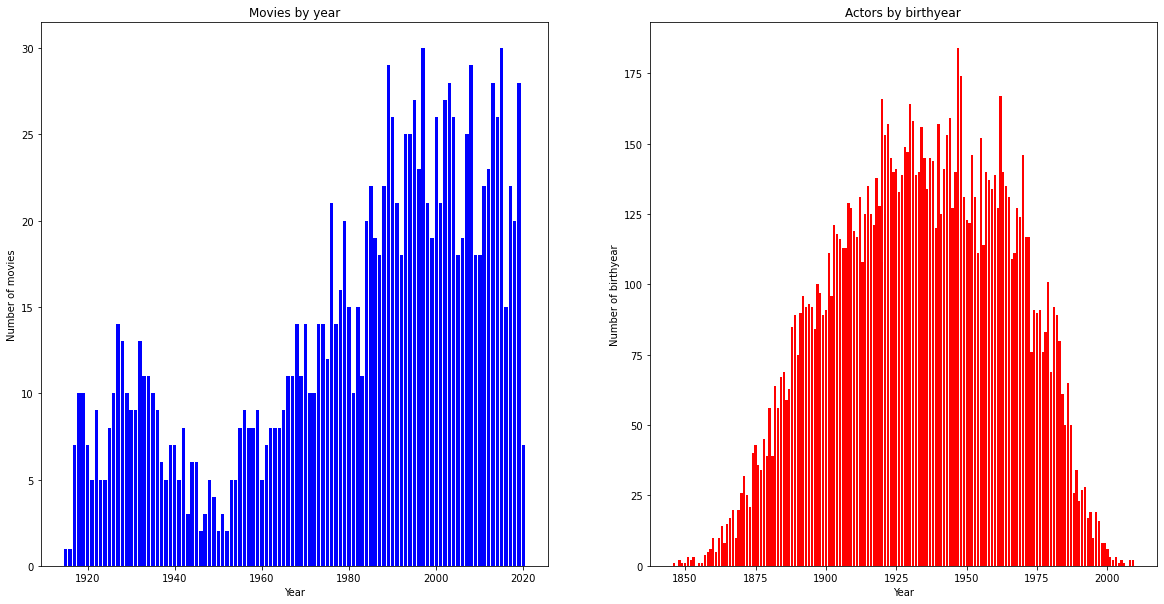

In [5]:
dfMoviesCountByYear = pd.read_json('http://localhost:8000/movies/count_by_year')
dfBirthyearCountByYear = pd.read_json('http://localhost:8000/stars/count_by_birthyear')
years = [int(x[:4]) for x in dfBirthyearCountByYear[0].values[1:]]

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,10))

ax1.set_xlabel("Year")
ax1.set_ylabel("Number of movies")
ax1.set_title('Movies by year')
ax1.bar(dfMoviesCountByYear[0].values, dfMoviesCountByYear[1].values, color = 'blue')

ax2.set_xlabel('Year')
ax2.set_ylabel('Number of birthyear')
ax2.set_title('Actors by birthyear')
ax2.bar(years, dfBirthyearCountByYear[1].values[1:],  color = 'red')


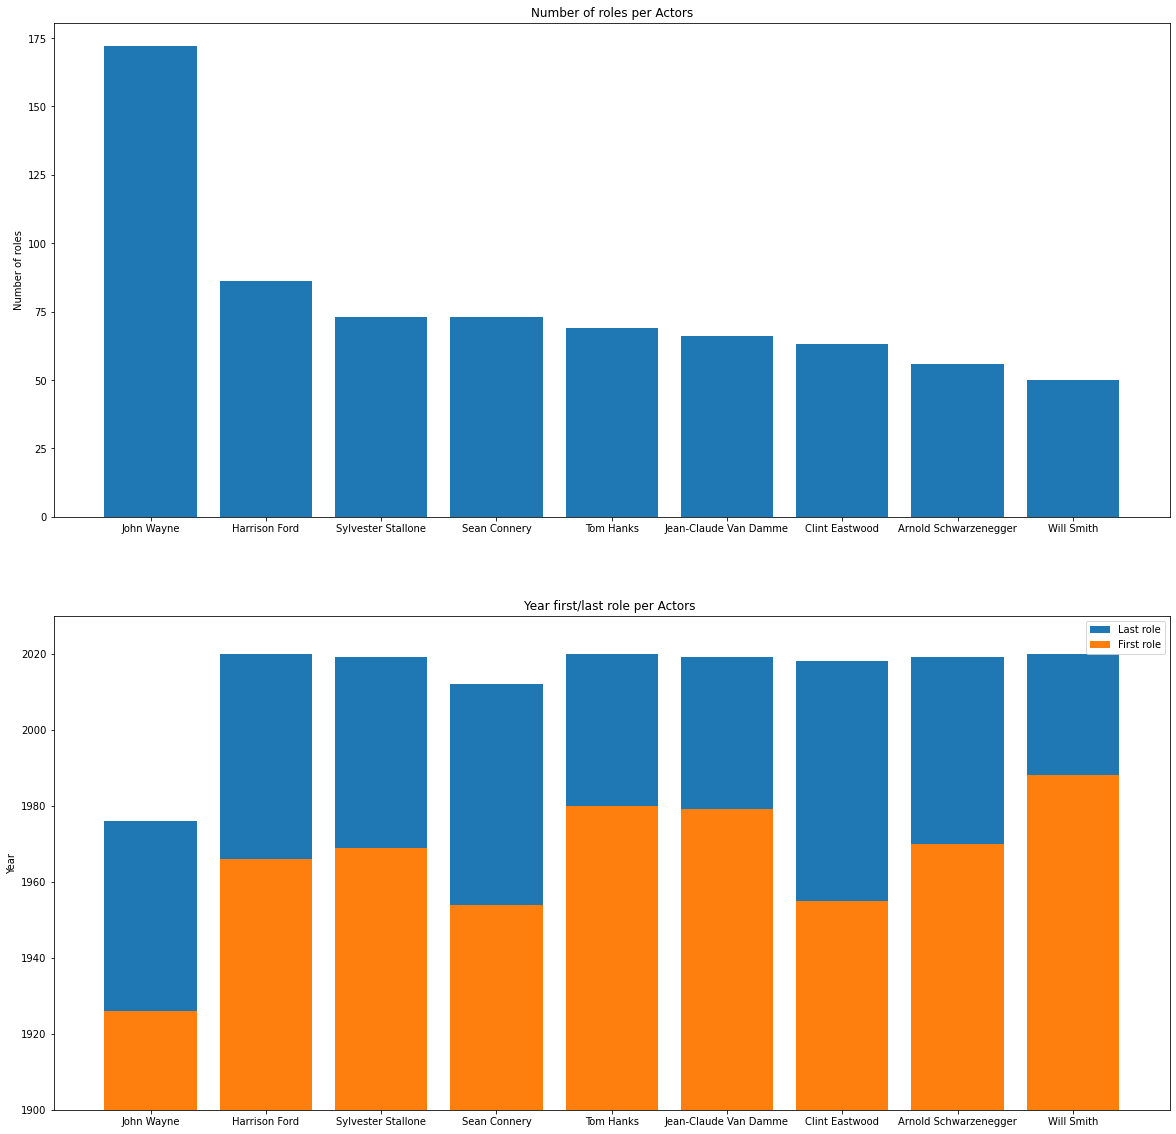

In [6]:
dfsa = dfStatsActors[:10]
fig, (ax1, ax2) = plt.subplots(2, figsize = (20, 20))

ax1.bar(dfsa['name'].values, dfsa['movie_count'].values)
ax1.set_ylabel('Number of roles')
ax1.set_title('Number of roles per Actors')

ax2.bar(dfsa['name'].values, dfsa['last_movie'].values, label='Last role')
ax2.bar(dfsa['name'].values, dfsa['first_movie'].values, label='First role')
ax2.set_ylabel('Year')
ax2.set_title('Year first/last role per Actors ')
ax2.set_ylim(1900,2030)
ax2.legend()